# Assessing GT tracks for dMtb modes

I.e. are there obviously different growth rates of mtb?

In [1]:
from natsort import natsorted
import btrack
import glob
import os
import re
from tqdm.auto import tqdm
from macrohet import dataio, tools, visualise
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.color_palette('PiYG')
sns.set(font='Nimbus Sans', style = 'white')
sns.set_theme(style="ticks")
sns.set_palette("Spectral")
expanded_piyg = visualise.color_palette('expanded_piyg').colors
sns.set_palette(expanded_piyg)

In [7]:
base_dir = '/mnt/DATA/macrohet/'
metadata_path = os.path.join(base_dir, 'macrohet_images/PS0000/Assaylayout/20210602_Live_cell_IPSDMGFP_ATB.xml')
assay_layout = dataio.read_harmony_metadata(metadata_path, assay_layout=True,)# mask_exist=True,  image_dir = image_dir, image_metadata = metadata)
assay_layout

Reading metadata XML file...
Extracting metadata complete!


Strain Compound Concentration ConcentrationEC
3 4    RD1     CTRL             0             EC0
  5     WT     CTRL             0             EC0
  6     WT      PZA            60            EC50
  7     WT      RIF           0.1            EC50
  8     WT      INH          0.04            EC50
  9     WT      BDQ          0.02            EC50
4 4    RD1     CTRL             0             EC0
  5     WT     CTRL             0             EC0
  6     WT      PZA            60            EC50
  7     WT      RIF           0.1            EC50
  8     WT      INH          0.04            EC50
  9     WT      BDQ          0.02            EC50
5 4    RD1     CTRL             0             EC0
  5     WT     CTRL             0             EC0
  6     WT      PZA           400            EC99
  7     WT      RIF             2            EC99
  8     WT      INH             2            EC99
  9     WT      BDQ           2.5            EC99
6 4    RD1     CTRL             0             EC0
  5     WT     CTRL             0             EC0
  6     WT      PZA           400            EC99
  7     WT      RIF             2            EC99
  8     WT      INH             2            EC99
  9     WT      BDQ           2.5            EC99

In [11]:
tracks_dict = dict()
for tracks_fn in tqdm(natsorted(glob.glob(os.path.join(base_dir, f'labels/macrohet_seg_model/*.h5')))):
    with btrack.io.HDF5FileHandler(tracks_fn, 'r') as hdf:
        tracks = hdf.tracks
        row, column = [int(x) for x in re.search(r'\((\d{1,2}),\s*(\d{1,2})\)\.h5$', tracks_fn).groups()]
    # load track score dict
    track_performance_dict_fn = os.path.join(base_dir, f'upstream_development/tracking/tracking_performance/{row},{column}/({row}, {column})_track_assessment.json')
    with open(track_performance_dict_fn, 'r') as json_file:
        # Load the JSON data into a Python dictionary
        track_performance_dict = json.load(json_file)
    # check the number of tracks you checked
    # filter for true tracks
    tracks = [t for t in tracks if str(t.ID) in track_performance_dict.keys() and track_performance_dict[str(t.ID)] == True and len(t) > 70]
    tracks_dict[row,column] = tracks

  0%|          | 0/24 [00:00<?, ?it/s]

[INFO][2023/08/24 04:25:36 PM] Opening HDF file: /mnt/DATA/macrohet/labels/macrohet_seg_model/(3, 4).h5...
[INFO][2023/08/24 04:25:36 PM] Loading tracks/obj_type_1
[INFO][2023/08/24 04:25:36 PM] Loading LBEP/obj_type_1
[INFO][2023/08/24 04:25:36 PM] Loading objects/obj_type_1 (39878, 5) (39878 filtered: None)
[INFO][2023/08/24 04:25:37 PM] Closing HDF file: /mnt/DATA/macrohet/labels/macrohet_seg_model/(3, 4).h5
[INFO][2023/08/24 04:25:37 PM] Opening HDF file: /mnt/DATA/macrohet/labels/macrohet_seg_model/(3, 5).h5...
[INFO][2023/08/24 04:25:37 PM] Loading tracks/obj_type_1
[INFO][2023/08/24 04:25:37 PM] Loading LBEP/obj_type_1
[INFO][2023/08/24 04:25:37 PM] Loading objects/obj_type_1 (41424, 5) (41424 filtered: None)
[INFO][2023/08/24 04:25:38 PM] Closing HDF file: /mnt/DATA/macrohet/labels/macrohet_seg_model/(3, 5).h5
[INFO][2023/08/24 04:25:38 PM] Opening HDF file: /mnt/DATA/macrohet/labels/macrohet_seg_model/(3, 6).h5...
[INFO][2023/08/24 04:25:38 PM] Loading tracks/obj_type_1
[INFO]

In [33]:
ctrl_tracks = tracks_dict[3,5] + tracks_dict[4,5] + tracks_dict[5,5] + tracks_dict[6,5]

Number of control cells

In [34]:
len(ctrl_tracks)

775

Number of infected cells at t = 0

In [35]:
len([t for t in ctrl_tracks if t.properties['Infected'][0] == 1] )

396

Number of cells that are infected for most of their life (over 34 hours)

In [36]:
len([t for t in ctrl_tracks if np.nanmean(t.properties['Infected']) >= 0.5]) 

458

# How do the populations of Mtb grow?

In [38]:
t = ctrl_tracks[0]
t

,ID,t,x,y,z,parent,root,state,generation,dummy,Infected,mean_intensity,area,orientation,major_axis_length,minor_axis_length
0,423,0,723.909912,33.010132,0.000000,423,423,5,0,False,1.0,"(3,) array",23203.0,-0.105442,344.046997,87.624420
1,423,1,727.771362,38.211437,0.000000,423,423,5,0,False,1.0,"(3,) array",25659.0,-0.105384,410.356964,95.545296
2,423,2,730.887634,26.283424,0.000000,423,423,5,0,False,1.0,"(3,) array",19483.0,-0.172310,281.636444,89.392372
3,423,3,732.147583,27.895367,0.000000,423,423,5,0,False,1.0,"(3,) array",22840.0,-0.172292,325.991333,92.556488
4,423,4,730.891357,33.019173,0.000000,423,423,5,0,False,1.0,"(3,) array",23224.0,-0.152742,373.707001,80.582886
5,423,5,731.606384,30.630995,0.000000,423,423,5,0,False,1.0,"(3,) array",21159.0,-0.151112,351.986481,78.869858
6,423,6,732.788086,30.744682,0.000000,423,423,5,0,False,1.0,"(3,) array",21750.0,-0.169930,358.099487,79.728958
7,423,7,733.528625,27.149408,0.000000,423,423,5,0,False,0.0,"(3,) array",15457.0,-0.195798,294.958893,67.987579
8,423,8,733.524414,32.480957,0.000000,423,423,5,0,False,1.0,"(3,) array",21431.0,-0.201907,385.717529,73.575928
9,423,9,735.238953,29.900726,0.000000,423,423,5,0,False,1.0,"(3,) array",22385.0,-0.251289,409.529633,79.070381


In [39]:
mtb_t_data = [t.properties['mean_intensity'][:,2] for t in ctrl_tracks]

<AxesSubplot:>

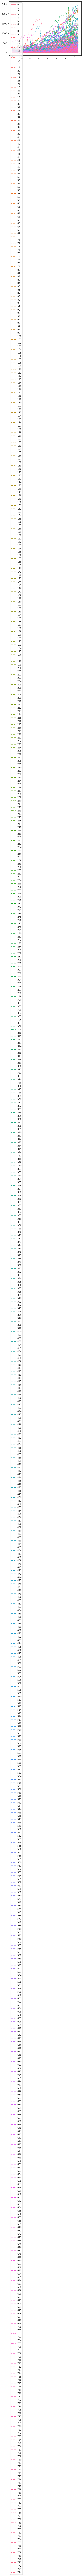

In [42]:
sns.lineplot(data = mtb_t_data)